<a href="https://colab.research.google.com/github/EveraldoJunior7/Colab-Engenharia-Computacao/blob/main/Calculo_Numerico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Raízes da Função

Bibliotecas necessárias para o programa

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sp
import math
import time

## Funções do código

In [ ]:
def F(x):
  return 20 * np.arccos(1 - x/2) - 5 * (2 - x) * (4 * x - x ** 2) ** 0.5 - 8
    # return sp.exp(-x**2) - sp.cos(x)
    # return x * np.log(x) - 3.2
    # return x ** 3 + x ** 2 - 3 * x - 5
    # return np.tanh(x ** 2 - 9)

In [ ]:
def dF(xi):
    x = sp.Symbol('x')
    dfdx = sp.diff(F(x), x)
    return sp.lambdify([x], dfdx)(xi)

In [ ]:
def G(x):
    return np.exp(-x**2)

## Funções de Gráfico

In [ ]:
def gerar_grafico(a, b):
    x = np.arange(a,b + 0.01, 0.01)
    plt.plot(x, F(x))
    plt.plot(x, np.zeros(len(x)), color='gray', linewidth=0.5, linestyle='--')
    # plt.plot((a + b)/2, 0, 'b.')
    plt.show()

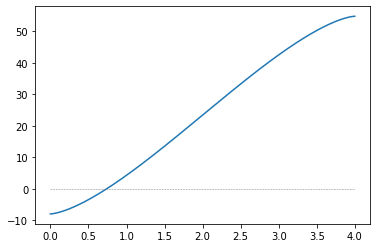

In [ ]:
gerar_grafico(0, 4)

In [ ]:
def gerar_grafico_e_reta(a, b):
    x = np.arange(a,b + 0.01, 0.01)
    plt.plot(x, F(x))
    plt.plot(x, F(a) + ((F(b) - F(a)) / (b - a)) * (x - a))
    plt.plot(x, np.zeros(len(x)), color='gray', linewidth=0.5, linestyle='--')
    plt.show()

In [ ]:
gerar_grafico_e_reta(-10, F(6))

NameError: ignored

## Aproximação Inicial

In [ ]:
def estudo_funcao(a, b, iteracoes):
    '''a) valor minimo do intervalo, b) valor maximo do intervalor, iteracoes) quantidade de vezes que se repete'''
    delta = (b - a) / (iteracoes - 1)
    xi = a
    data = []
    while(xi <= b):
        yi = F(xi)
        if yi > 0.0:
            sinal = '+'
        elif yi < 0.0:
            sinal = '-'
        else:
            sinal = '='
        data.append(pd.Series({'x': round(xi, 3), 'F(x)': yi, 'sinal': sinal}))
        xi += delta
    return pd.DataFrame(data)

In [ ]:
estudo_funcao(0, 4, 11)

,x,F(x),sinal
0,0.0,-8.000000,-
1,0.4,-4.729978,-
2,0.8,0.945904,+
3,1.2,7.853469,+
4,1.6,15.469585,+
5,2.0,23.415927,+
6,2.4,31.362269,+
7,2.8,38.978385,+
8,3.2,45.885949,+
9,3.6,51.561831,+


## Método da Bissecção

In [ ]:
def metodo_bisseccao(a, b, casas_decimais=8):
    '''
    a = chute inicial de x,
    b = chute final de x,
    casas_decimais = erro depois da virgula
    '''
    erro = 10 ** -casas_decimais
    c = b - a
    xi = (a + b) / 2

    iteracoes = 1
    while(c > erro):
        gerar_grafico(a, b)
        print("INICIO: {}, MEIO: {}, FIM: {}".format(a, xi, b))
        print("F(x): {}, x: {}".format(round(F(xi), casas_decimais + 1), round(xi, casas_decimais + 1)))
        if F(a) * F(xi) < 0:
            b = xi
        elif F(b) * F(xi) < 0:
            a = xi
        c = b - a
        xi = (a + b) / 2
        iteracoes += 1
    print("Resultado:", round(xi, casas_decimais), ", Iterações:", iteracoes)

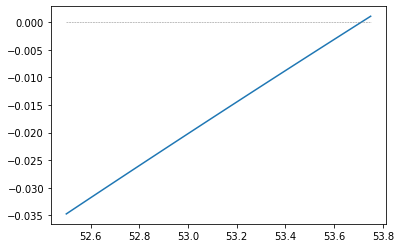

INICIO: 52.5, MEIO: 53.125, FIM: 53.75
F(x): -0.01659781, x: 53.125
0.625


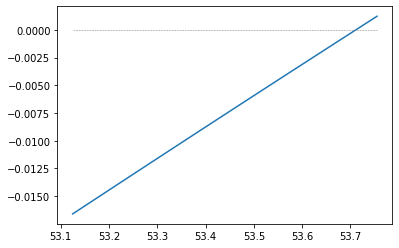

INICIO: 53.125, MEIO: 53.4375, FIM: 53.75
F(x): -0.007696089, x: 53.4375
0.3125


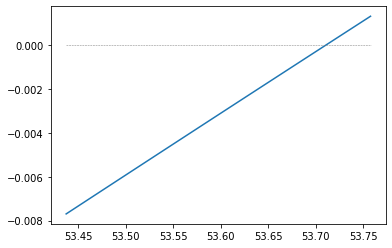

INICIO: 53.4375, MEIO: 53.59375, FIM: 53.75
F(x): -0.003286782, x: 53.59375
0.15625


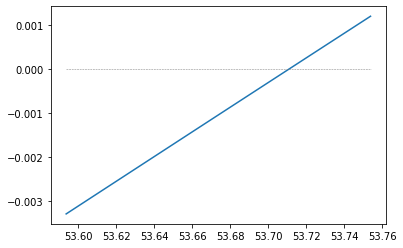

INICIO: 53.59375, MEIO: 53.671875, FIM: 53.75
F(x): -0.001092441, x: 53.671875
0.078125


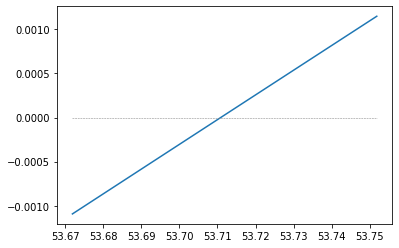

INICIO: 53.671875, MEIO: 53.7109375, FIM: 53.75
F(x): 2.161e-06, x: 53.7109375
0.0390625


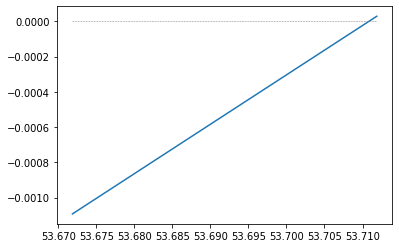

INICIO: 53.671875, MEIO: 53.69140625, FIM: 53.7109375
F(x): -0.000544926, x: 53.69140625
0.01953125


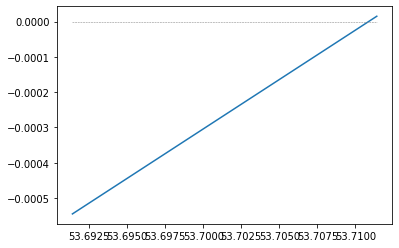

INICIO: 53.69140625, MEIO: 53.701171875, FIM: 53.7109375
F(x): -0.000271329, x: 53.701171875
0.009765625


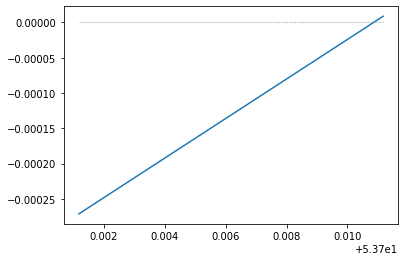

INICIO: 53.701171875, MEIO: 53.7060546875, FIM: 53.7109375
F(x): -0.000134571, x: 53.706054688
0.0048828125


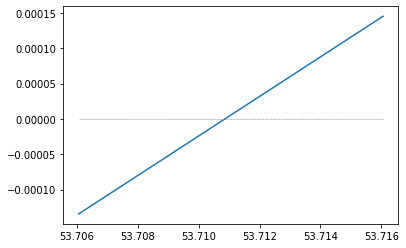

INICIO: 53.7060546875, MEIO: 53.70849609375, FIM: 53.7109375
F(x): -6.6202e-05, x: 53.708496094
0.00244140625


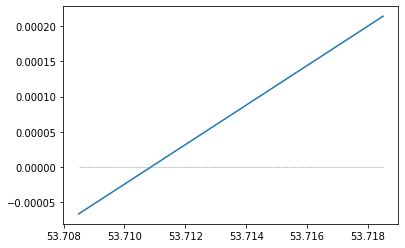

INICIO: 53.70849609375, MEIO: 53.709716796875, FIM: 53.7109375
F(x): -3.202e-05, x: 53.709716797
0.001220703125


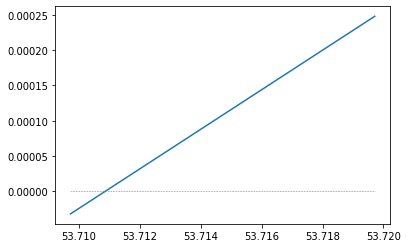

INICIO: 53.709716796875, MEIO: 53.7103271484375, FIM: 53.7109375
F(x): -1.4929e-05, x: 53.710327148
0.0006103515625


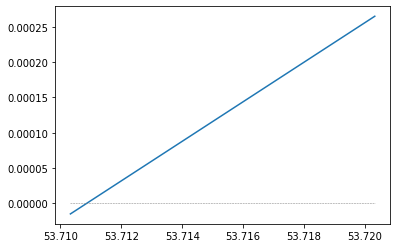

INICIO: 53.7103271484375, MEIO: 53.71063232421875, FIM: 53.7109375
F(x): -6.384e-06, x: 53.710632324
0.00030517578125


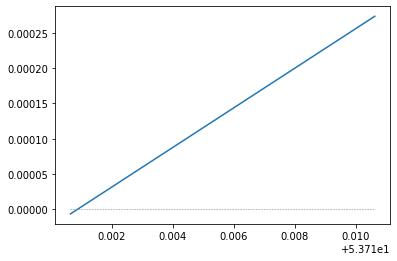

INICIO: 53.71063232421875, MEIO: 53.710784912109375, FIM: 53.7109375
F(x): -2.112e-06, x: 53.710784912
0.000152587890625


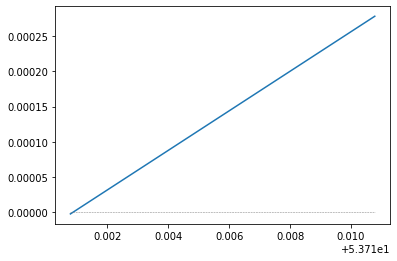

INICIO: 53.710784912109375, MEIO: 53.71086120605469, FIM: 53.7109375
F(x): 2.5e-08, x: 53.710861206
7.62939453125e-05


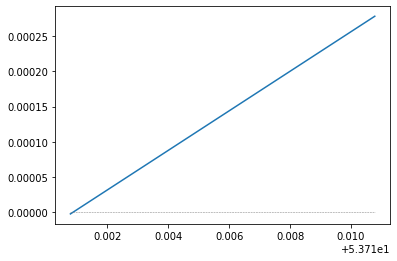

INICIO: 53.710784912109375, MEIO: 53.71082305908203, FIM: 53.71086120605469
F(x): -1.044e-06, x: 53.710823059
3.814697265625e-05


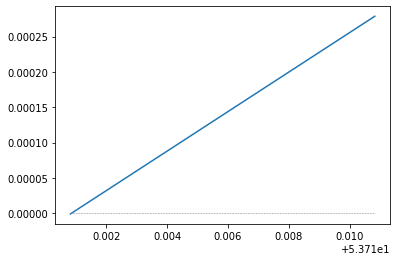

INICIO: 53.71082305908203, MEIO: 53.71084213256836, FIM: 53.71086120605469
F(x): -5.1e-07, x: 53.710842133
1.9073486328125e-05


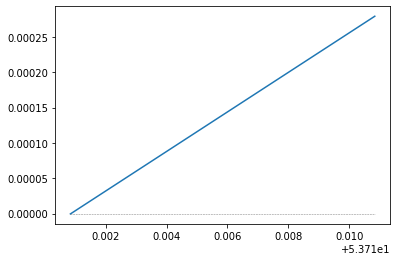

INICIO: 53.71084213256836, MEIO: 53.71085166931152, FIM: 53.71086120605469
F(x): -2.42e-07, x: 53.710851669
9.5367431640625e-06


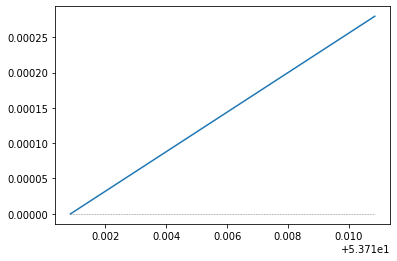

INICIO: 53.71085166931152, MEIO: 53.710856437683105, FIM: 53.71086120605469
F(x): -1.09e-07, x: 53.710856438
4.76837158203125e-06


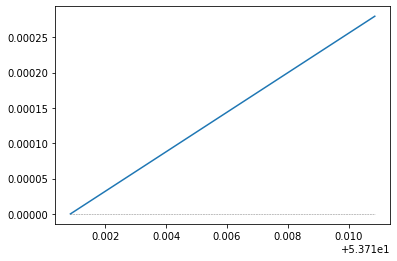

INICIO: 53.710856437683105, MEIO: 53.7108588218689, FIM: 53.71086120605469
F(x): -4.2e-08, x: 53.710858822
2.384185791015625e-06


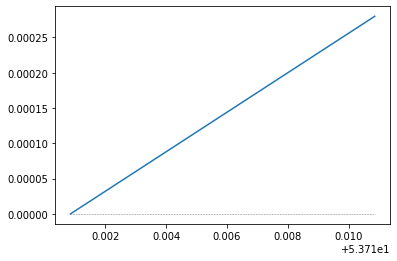

INICIO: 53.7108588218689, MEIO: 53.71086001396179, FIM: 53.71086120605469
F(x): -9e-09, x: 53.710860014
1.1920928955078125e-06


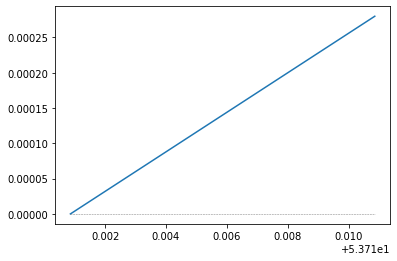

INICIO: 53.71086001396179, MEIO: 53.71086061000824, FIM: 53.71086120605469
F(x): 8e-09, x: 53.71086061
5.960464477539062e-07


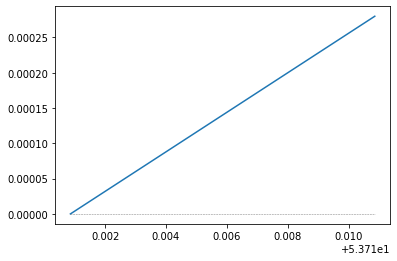

INICIO: 53.71086001396179, MEIO: 53.710860311985016, FIM: 53.71086061000824
F(x): -0.0, x: 53.710860312
2.980232238769531e-07


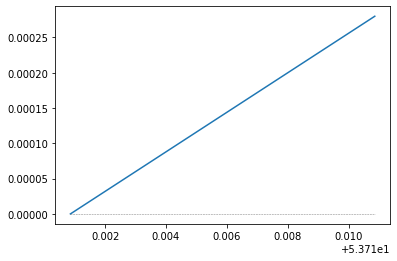

INICIO: 53.710860311985016, MEIO: 53.71086046099663, FIM: 53.71086061000824
F(x): 4e-09, x: 53.710860461
1.4901161193847656e-07


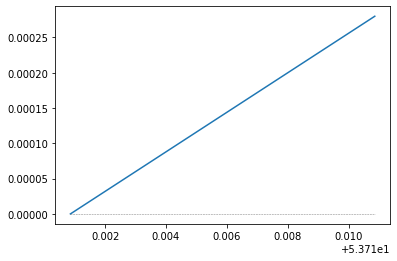

INICIO: 53.710860311985016, MEIO: 53.71086038649082, FIM: 53.71086046099663
F(x): 2e-09, x: 53.710860386
7.450580596923828e-08


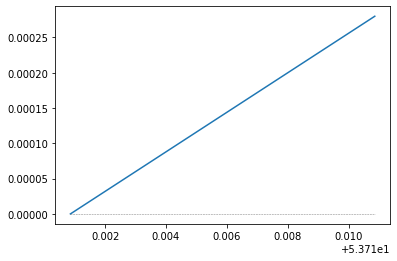

INICIO: 53.710860311985016, MEIO: 53.71086034923792, FIM: 53.71086038649082
F(x): 1e-09, x: 53.710860349
3.725290298461914e-08


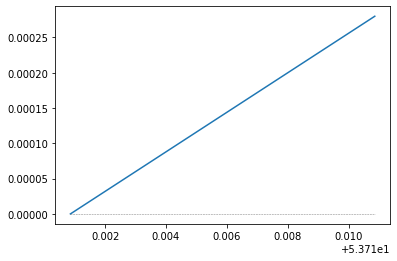

INICIO: 53.710860311985016, MEIO: 53.71086033061147, FIM: 53.71086034923792
F(x): 0.0, x: 53.710860331
1.862645149230957e-08


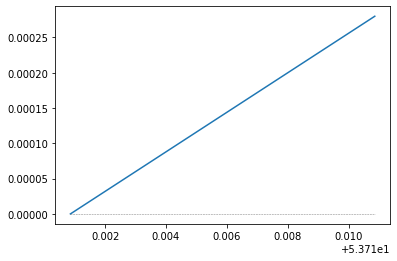

INICIO: 53.710860311985016, MEIO: 53.71086032129824, FIM: 53.71086033061147
F(x): -0.0, x: 53.710860321
9.313225746154785e-09
Resultado: 53.71086033 , Iterações: 28


In [ ]:
metodo_bisseccao(52.5, 53.75)

## Método da falsa posição ou método das cordas

In [ ]:
def falsa_posicao(a, b, casas_decimais=8):
    '''
    a = chute inicial de x,
    b = chute final de x,
    casas_decimais = erro depois da virgula
    '''
    erro = 10 ** -casas_decimais
    c = b - a
    xi = (a * F(b) - b * F(a)) / (F(b) - F(a))
    iteracoes = 1
    while(c > erro):
        gerar_grafico_e_reta(a, b)
        print("INICIO:", a, ", X:", xi, ", FIM:", b)
        if F(a) * F(xi) < 0:
            b = xi
        elif F(b) * F(xi) < 0:
            a = xi
        c = b - a
        xi = (a + b) / 2
        iteracoes += 1
    print("Resultado:", round(xi, casas_decimais), ", Iterações:", iteracoes)

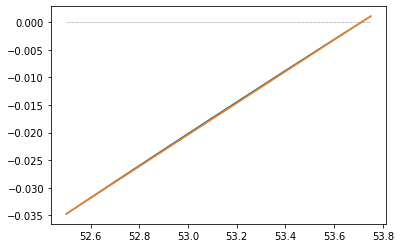

INICIO: 52.5 , X: 53.71180077288097 , FIM: 53.75
1.21180077288097


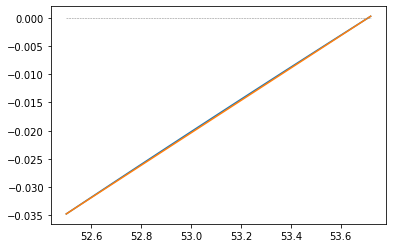

INICIO: 52.5 , X: 53.10590038644048 , FIM: 53.71180077288097
0.6059003864404886


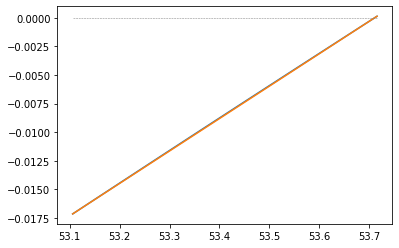

INICIO: 53.10590038644048 , X: 53.40885057966072 , FIM: 53.71180077288097
0.30295019322024785


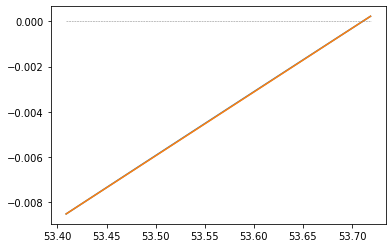

INICIO: 53.40885057966072 , X: 53.56032567627085 , FIM: 53.71180077288097
0.15147509661012037


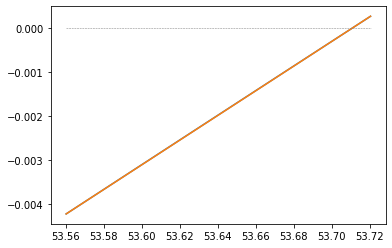

INICIO: 53.56032567627085 , X: 53.636063224575906 , FIM: 53.71180077288097
0.07573754830506374


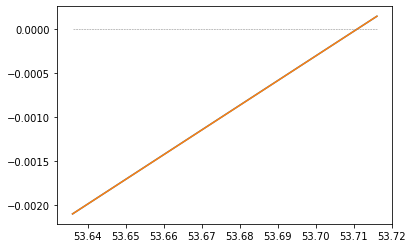

INICIO: 53.636063224575906 , X: 53.673931998728435 , FIM: 53.71180077288097
0.03786877415253542


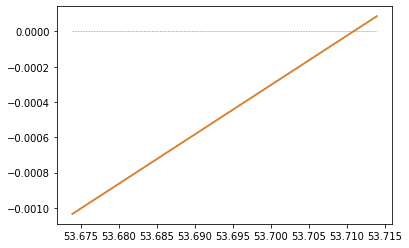

INICIO: 53.673931998728435 , X: 53.692866385804706 , FIM: 53.71180077288097
0.01893438707626416


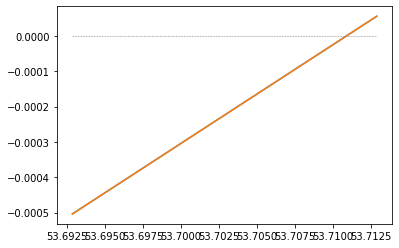

INICIO: 53.692866385804706 , X: 53.702333579342834 , FIM: 53.71180077288097
0.009467193538135632


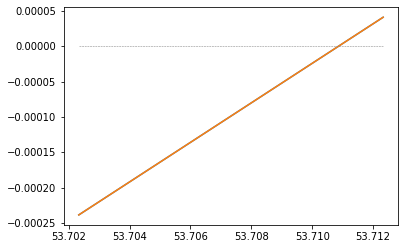

INICIO: 53.702333579342834 , X: 53.707067176111906 , FIM: 53.71180077288097
0.004733596769064263


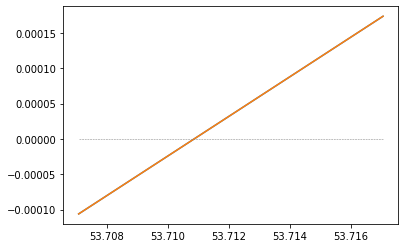

INICIO: 53.707067176111906 , X: 53.709433974496434 , FIM: 53.71180077288097
0.0023667983845356844


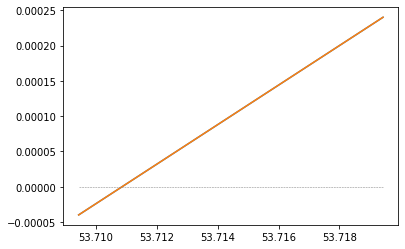

INICIO: 53.709433974496434 , X: 53.710617373688706 , FIM: 53.71180077288097
0.0011833991922642895


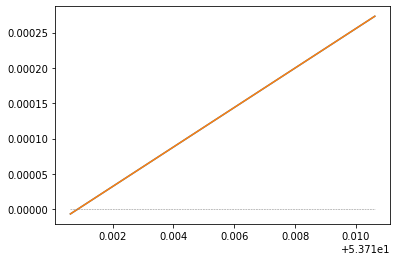

INICIO: 53.710617373688706 , X: 53.711209073284834 , FIM: 53.71180077288097
0.000591699596128592


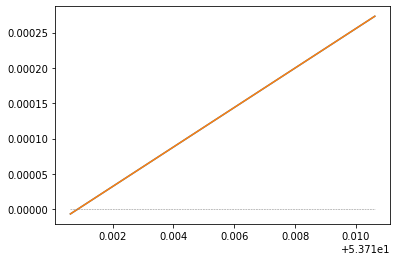

INICIO: 53.710617373688706 , X: 53.71091322348677 , FIM: 53.711209073284834
0.000295849798064296


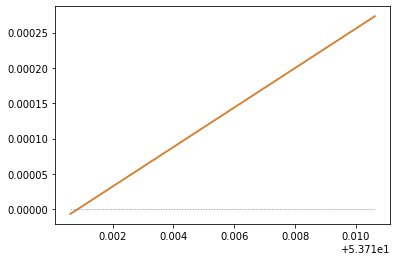

INICIO: 53.710617373688706 , X: 53.71076529858774 , FIM: 53.71091322348677
0.000147924899032148


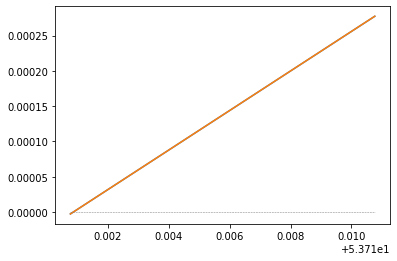

INICIO: 53.71076529858774 , X: 53.71083926103725 , FIM: 53.71091322348677
7.396244951962672e-05


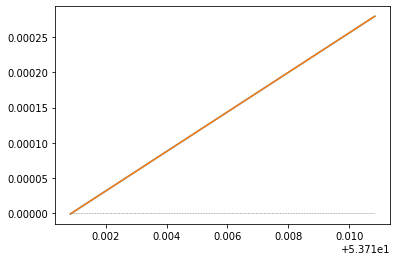

INICIO: 53.71083926103725 , X: 53.71087624226201 , FIM: 53.71091322348677
3.698122475981336e-05


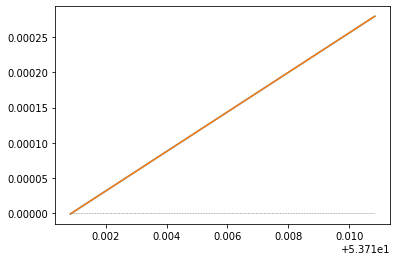

INICIO: 53.71083926103725 , X: 53.71085775164963 , FIM: 53.71087624226201
1.8490612383459393e-05


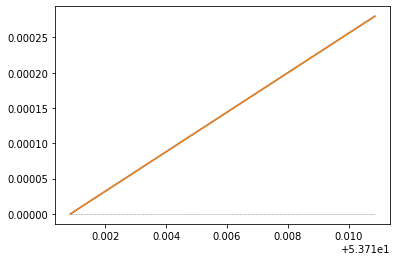

INICIO: 53.71085775164963 , X: 53.710866996955815 , FIM: 53.71087624226201
9.245306188176983e-06


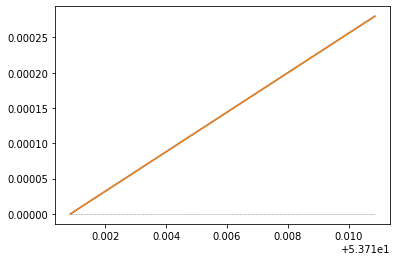

INICIO: 53.71085775164963 , X: 53.71086237430272 , FIM: 53.710866996955815
4.622653094088491e-06


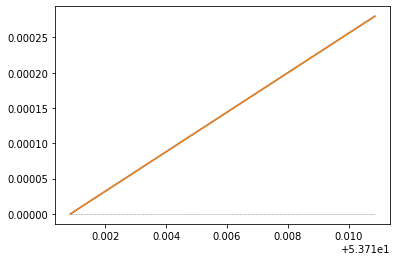

INICIO: 53.71085775164963 , X: 53.710860062976174 , FIM: 53.71086237430272
2.3113265470442457e-06


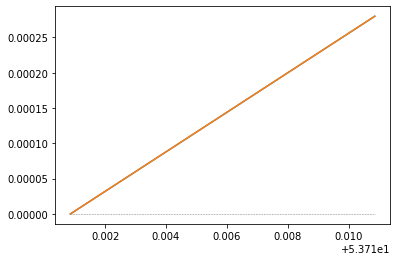

INICIO: 53.710860062976174 , X: 53.71086121863945 , FIM: 53.71086237430272
1.1556632770748365e-06


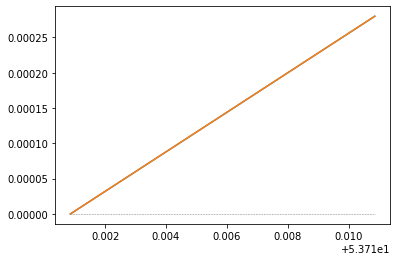

INICIO: 53.710860062976174 , X: 53.71086064080781 , FIM: 53.71086121863945
5.778316349847046e-07


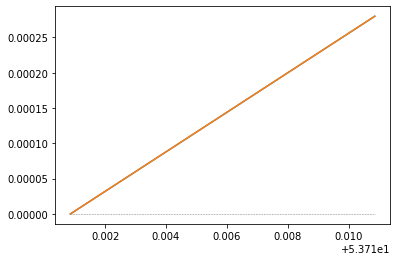

INICIO: 53.710860062976174 , X: 53.710860351891995 , FIM: 53.71086064080781
2.8891582104506597e-07


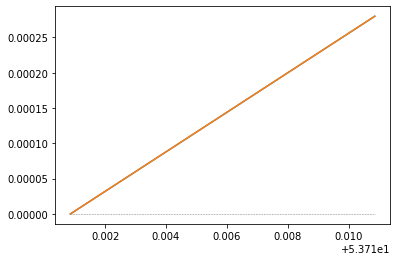

INICIO: 53.710860062976174 , X: 53.71086020743408 , FIM: 53.710860351891995
1.4445791407524666e-07


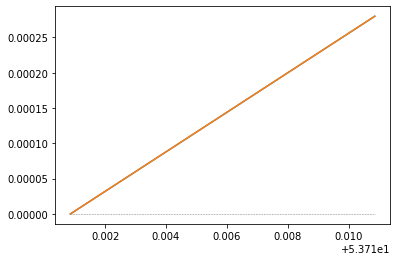

INICIO: 53.71086020743408 , X: 53.71086027966304 , FIM: 53.710860351891995
7.222895703762333e-08


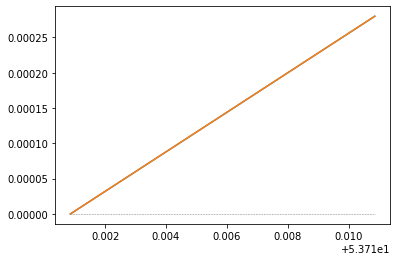

INICIO: 53.71086027966304 , X: 53.710860315777516 , FIM: 53.710860351891995
3.6114478518811666e-08


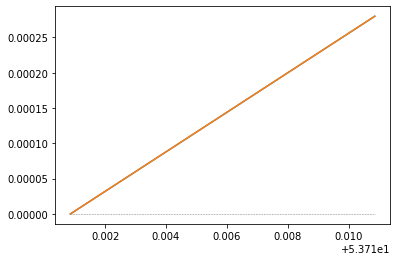

INICIO: 53.710860315777516 , X: 53.71086033383476 , FIM: 53.710860351891995
1.8057242812119512e-08


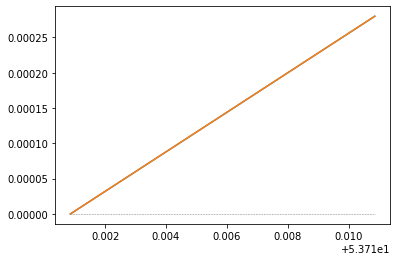

INICIO: 53.710860315777516 , X: 53.710860324806134 , FIM: 53.71086033383476
9.028624958773435e-09
Resultado: 53.71086033 , Iterações: 29


In [ ]:
falsa_posicao(52.5, 53.75)

## Método Linear Iterativo

In [ ]:
def linear_iterativo(x1, casas_decimais=3):
    iteracoes = 0
    erro = 10 ** -casas_decimais

    x2 = G(x1)
    x = np.linspace(x1 - 2, x1)
    plt.plot(x, G(x))
    plt.plot(x, x)
    plt.plot(x, np.linspace(0,0), color='gray', linewidth=0.5, linestyle='--')
    while(abs(x2 - x1) > erro and x1 > x2):
        plt.plot(x2, 0, 'b.')
        print(round(x2, casas_decimais))
        x1 = x2
        x2 = G(x1)
        iteracoes += 1
    if(x1 < x2):
        print("A função divergiu")
    else:
        plt.show()
        print("Resultado:", round(x2, casas_decimais), ", Iterações:", iteracoes)

In [ ]:
linear_iterativo(3)

NameError: ignored

## Método de Newton-Raphson

In [ ]:
def metodo_de_newton(x1, casas_decimais=8):
    '''
    x1 = valor inicial
    casas_decimais = erro depois da virgula
    '''
    x2 = x1 - (F(x1) / dF(x1))
    print('0: {} -> {}'.format(round(x1, casas_decimais), round(F(x1), casas_decimais + 1)))
    print('1: {} -> {}'.format(round(x2, casas_decimais), round(F(x2), casas_decimais + 1)))

    erro = 10 ** -casas_decimais
    iteracoes = 2
    while(abs(x2 - x1) > erro):
        x1 = x2
        x2 = x1 - (F(x1) / dF(x1))
        print('{}: {} -> {}'.format(iteracoes, round(x2, casas_decimais), round(F(x2), casas_decimais + 1)))
        iteracoes += 1
    print("Resultado:", round(x2, casas_decimais), ", Iterações:", iteracoes)

In [ ]:
metodo_de_newton(52.625)

0: 52.625 -> -0.031074046
1: 53.68761622 -> -0.000651138
2: 53.71084953 -> -3.02e-07
3: 53.71086033 -> -0.0
4: 53.71086033 -> 0.0
Resultado: 53.71086033 , Iterações: 5


## Método das Secantes

In [ ]:
def metodo_secante(a, b, casas_decimais=8):
    '''
    a = x inicial
    b = x final
    casas_decimais = erro depois da virgula
    '''

    print('0: {} -> {}'.format(a, round(F(a), casas_decimais + 1)))
    print('1: {} -> {}'.format(b, round(F(b), casas_decimais + 1)))

    a, b = b, a - ((F(a) * (b - a)) / (F(b) - F(a)))

    erro = 10 ** -casas_decimais
    iteracoes = 2
    while(abs(F(b)) > erro):
        print('{}: {} -> {}'.format(iteracoes, round(b, casas_decimais), round(F(b), casas_decimais + 1)))
        a, b = b, a - ((F(a) * (b - a)) / (F(b) - F(a)))
        iteracoes += 1
    print("Resultado:", round(b, casas_decimais), ", Iterações:", iteracoes)

In [ ]:
metodo_secante(52.5, 53.75)

0: 52.5 -> -0.03473857
1: 53.75 -> 0.001095053
2: 53.71180077 -> 2.6332e-05
3: 53.71085959 -> -2.1e-08
Resultado: 53.71086033 , Iterações: 4


## Método das Secantes Modificado

In [ ]:
def metodo_secante_modificado(a, casas_decimais=8):
    '''
    a = chute inicial
    casas_decimais = erro depois da virgula
    '''
    erro = 10 ** -casas_decimais
    b = a + erro

    print('0: {} -> {}'.format(a, round(F(a), casas_decimais + 1)))
    print('1: {} -> {}'.format(b, round(F(b), casas_decimais + 1)))

    a, b = b, a - ((F(a) * (b - a)) / (F(b) - F(a)))

    iteracoes = 2
    while(abs(F(b)) > erro):
        print('{}: {} -> {}'.format(iteracoes, round(b, casas_decimais), round(F(b), casas_decimais + 1)))
        a, b = b, a - ((F(a) * (b - a)) / (F(b) - F(a)))
        iteracoes += 1
    print("Resultado:", round(b, casas_decimais), ", Iterações:", iteracoes)

In [ ]:
metodo_secante_modificado(52.625)

0: 52.625 -> -0.031074046
1: 52.62500001 -> -0.031074045
2: 53.68761665 -> -0.000651126
3: 53.71035927 -> -1.403e-05
Resultado: 53.7108601 , Iterações: 4


# Equações Polinomiais

In [ ]:
def tracar_circulo(rmin, rmax):
  theta = np.linspace(0, 2*np.pi, 100)
  z = np.linspace(-10, 10, 100)
  figure, axes = plt.subplots(1)
  axes.set_aspect(1)
  plt.title('Anel com as raízes')
  plt.ylim(-10, 10)
  plt.xlim(-10, 10)
  plt.plot(z, np.zeros(len(z)), color='gray', linewidth=0.5, linestyle='--')

  a = rmin*np.cos(theta)
  b = rmin*np.sin(theta)
  axes.plot(a, b, c='b')

  a = rmax*np.cos(theta)
  b = rmax*np.sin(theta)
  axes.plot(a, b, c='b')
  plt.show()

## Cota de Módulo Máximo

In [ ]:
def  cota_limite(*coeficientes):
  c1 = [abs(x) for x in coeficientes]
  c2 = c1

  a1 = c1.pop(0)
  rmax = 1 + max(c1) / a1

  an1 = c2.pop(-1)
  rmin = 1 / (1 + max(c2) / an1)

  tracar_circulo(rmin, rmax)
  print('As raizes de P{}(x)=0 estão no intervalo {} <= |a| <= {}.'
  .format(len(coeficientes) - 1, round(rmin, 7), round(rmax, 7)))

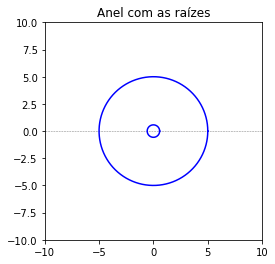

As raizes de P4(x)=0 estão no intervalo 0.5714286 <= |a| <= 5.0.


In [ ]:
cota_limite(2, 0, 6, 0, 8)

## Cota de Kojima

In [ ]:
def cota_kojima(*coeficientes):
  coeficientes = list(coeficientes)
  c1, c2 = coeficientes, coeficientes[::-1]
  a1 = c1.pop(0)
  qi = []
  i = 1
  for ai in c1:
    qi += [abs(ai / a1) ** (1 / i)]
    i = i + 1
  print(qi)

  max1 = qi.pop(qi.index(max(qi)))
  max2 = max(qi)
  rmax = max1 + max2

  a1 = c2.pop(0)
  qi = []
  i = 1
  for ai in c2:
    qi += [abs(ai / a1) ** (1 / i)]
    i = i + 1
  print(qi)
  max1 = qi.pop(qi.index(max(qi)))
  max2 = max(qi)
  rmin = 1 / (max1 + max2)

  tracar_circulo(rmin, rmax)
  print('As raizes de P{}(x)=0 estão no intervalo {} <= |a| <= {}.'
  .format(len(coeficientes), round(rmin, 7), round(rmax, 7)))

[0.0, 1.7320508075688772, 0.0, 1.4142135623730951]
[0.0, 0.8660254037844386, 0.0, 0.7071067811865476]


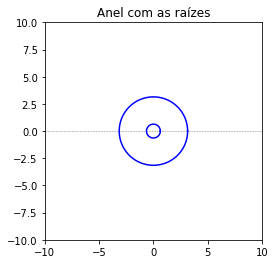

As raizes de P4(x)=0 estão no intervalo 0.6356745 <= |a| <= 3.1462644.


In [ ]:
cota_kojima(2, 0, 6, 0, 8)

## Cota de Cauchy

In [ ]:
def cota_cauchy(*coeficientes, casas_decimais=7):
  erro = 10 ** -casas_decimais
  c1, c2 = list(coeficientes), list(coeficientes)[::-1]
  a1 = c1.pop(0)
  n = len(c1)
  x0, xk, cont = 1, 0, 1
  while(abs(xk - x0) > erro):
    i, x0, s = n, xk, 0
    for a in c1:
      i = i - 1
      s += abs(a/a1) * (x0 ** i)
    xk = s ** (1/n)
    print('{}: {}'.format(cont, round(xk, casas_decimais)))
    cont += 1
  rmax = xk

  print()

  a1 = c2.pop(0)
  n = len(c2)
  x0, xk, cont = 1, 0, 1
  while(abs(xk - x0) > erro):
    i, x0, s = n, xk, 0
    for a in c2:
      i = i - 1
      s += abs(a/a1) * (x0 ** i)
    xk = s ** (1/n)
    print('{}: {}'.format(cont, round(xk, casas_decimais)))
    cont += 1
  rmin = 1 / xk

  tracar_circulo(rmin, rmax)
  print('\nAs raizes de P{}(x)=0 estão no intervalo {} <= |a| <= {}.'
  .format(len(coeficientes) - 1, round(rmin, 7), round(rmax, 7)))

1: 1.4142136
2: 1.7782794
3: 1.9163618
4: 1.9685578
5: 1.9881978
6: 1.9955725
7: 1.9983395
8: 1.9993773
9: 1.9997665
10: 1.9999124
11: 1.9999672
12: 1.9999877
13: 1.9999954
14: 1.9999983
15: 1.9999994
16: 1.9999998
17: 1.9999999
18: 2.0

1: 0.7071068
2: 0.8891397
3: 0.9581809
4: 0.9842789
5: 0.9940989
6: 0.9977863
7: 0.9991697
8: 0.9996886
9: 0.9998832
10: 0.9999562
11: 0.9999836
12: 0.9999938
13: 0.9999977
14: 0.9999991
15: 0.9999997
16: 0.9999999
17: 1.0


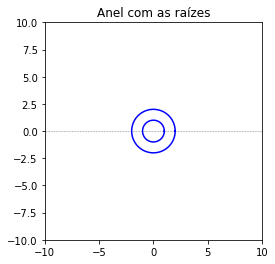


As raizes de P4(x)=0 estão no intervalo 1.0 <= |a| <= 2.0.


In [ ]:
cota_cauchy(2, 0, 6, 0, 8)
#cota_cauchy(-5, 100, -75, 25, 125)

## Propriedades

In [ ]:
def sinais_de_descartes(*coeficientes):
  n = len(coeficientes) - 1
  c1 = [x for x in coeficientes if x != 0]
  contp = 0
  for index, numero in enumerate(c1[:-1], start=1):
    if (numero * c1[index]) < 0:
      contp += 1

  c2 = [x * -1 for x in coeficientes if x != 0]
  contn = 0
  for index, numero in enumerate(c2[:-1], start=1):
    if (numero * c2[index]) < 0:
      contn += 2

  while contn >= 0:
    print('--------------------------------------')
    print(f'Possui {contp} raizes reais positivas')
    print(f'Possui {contn} raizes reais negativas')
    print(f'Possui {n - contn - contp} raizes complexas')
    contn -= 2

In [ ]:
sinais_de_descartes(1, 1, -1, -1, 0, 0)

--------------------------------------
Possui 1 raizes reais positivas
Possui 2 raizes reais negativas
Possui 2 raizes complexas
--------------------------------------
Possui 1 raizes reais positivas
Possui 0 raizes reais negativas
Possui 4 raizes complexas


## Método de Muller

In [ ]:
def metodo_de_muller(x0, casas_decimais=16):
  l = 10 ** -casas_decimais
  i = 0
  x1 = x0 * 0.99
  x2 = x0 * 0.98
  while (abs(x0 - x1) > l):
    q = (x0 - x1) / (x1 - x2)
    a = q * F(x0) - q * (1 + q) * F(x1) + q ** 2 * F(x2)
    b = (2 * q + 1) * F(x0) - (1 + q) ** 2 * F(x1) + q ** 2 * F(x2)
    c = (1 + q) * F(x0)
    res = x0 - (x0 - x1) * (2 * c / (b + np.sign(b) * (b ** 2 - 4 * a * c) ** 0.5))
    print(i, res)
    i += 1
    x2 = x1
    x1 = x0
    x0 = res
  print(f'Resultado: {np.round(x0, 3)}')

In [ ]:
metodo_de_muller(2)

0 (1.1706447283093477+0.7201936892275991j)
1 (0.8826287782643951+0.9364057411383534j)
2 (0.7782307306897274-0.12089750914209685j)
3 (0.30361337663637494-0.4018618154885678j)
4 (0.11515944728903152-0.8901817789175267j)
5 (0.1985132385035825-1.2997313670480897j)
6 (0.5862246065646173-1.4511176211931947j)
7 (0.481946951714333-1.3164016182218718j)
8 (0.4993455468969135-1.3229508910967847j)
9 (0.4999985908984391-1.3228761938511668j)
10 (0.49999999999810296-1.3228756555180468j)
11 (0.5-1.3228756555322954j)
12 (0.5-1.3228756555322954j)
Resultado: (0.5-1.323j)


# Questão 2
Você está projetando um tanque esférico, figura ao lado, para armazenar água para uma pequena vila em um país em desenvolvimento. O volume de liquido que ele pode armazenar pode ser calculado por $V = \pi h^{2}\frac{\left ( 3R-h \right )}{3}$ onde $V$ é o volume ($m^{3}$), $h$ é a profundidade da água no tanque ($m$) e $R$ é o raio do tanque ($m$). Se $R=3$, até qual profundidade o tanque deve ser enchido para que armazene $30 m^{3}$? Use três iterações do método de Newton-Raphson para determinar sua resposta. Determine o erro relativo aproximado depois de cada iteração.
<img src="https://d2vlcm61l7u1fs.cloudfront.net/media%2F4e8%2F4e845408-7b12-4c07-b0b3-c0bf31d56e8e%2FphpqXr7yd.png" width=256>

<hr>

$f(h) = \pi h^{2}\frac{\left ( 3R-h \right )}{3}-V$  
$f(h) = \frac{3 R}{3}\pi h^{2}-\frac{h}{3}\pi h^{2}-V$  
$\boldsymbol{f(h) = \pi Rh^{2}-\frac{\pi}{3} h^{3}-V}$  
$f'(h) = 2\pi Rh^{1}-\frac{3\pi}{3} h^{2}$   
$\boldsymbol{f'(h) = 2\pi Rh-\pi h^{2}}$

In [ ]:
R = 3 #@param {type:"slider", min:0.1, max:10, step:0.1}
V = 30 #@param {type:"slider", min:0, max:83.1, step:0.1}

def F(h):
  return np.pi * R * h ** 2 - np.pi / 3 * h ** 3 - V
def dF(hi):
  h = sp.Symbol('h')
  dfdh = sp.diff(F(h), h)
  return sp.lambdify([h], dfdh)(hi)

In [ ]:
def Questao2(h1, casas_decimais=3):
  dados = {
      'ki': [],
      'ki+1': [],
      'erro': []
  }
  l = 10 ** -casas_decimais
  h0 = 0
  while(abs(h1 - h0) > l):
    h0 = h1
    h1 = h0 - (F(h0) / dF(h0))
    erro = abs(h1 - h0) / h1 * 100
    dados['ki'] += [h0]
    dados['ki+1'] += [h1]
    dados['erro'] += [erro]
  print(f'Resultado: {round(h1, casas_decimais)}m, Erro: {round(erro, casas_decimais)}%')
  return pd.DataFrame(dados)

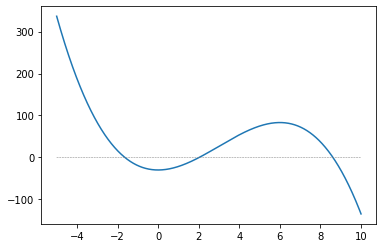

In [ ]:
gerar_grafico(-5, 10)

In [ ]:
estudo_funcao(0, 6, 10)

,x,F(x),sinal
0,0.000,-30.000000,-
1,0.667,-26.121491,-
2,1.333,-15.727085,-
3,2.000,-0.678469,-
4,2.667,17.162675,+
5,3.333,35.934661,+
6,4.000,53.775804,+
7,4.667,68.824421,+
8,5.333,79.218826,+
9,6.000,83.097336,+


In [ ]:
Questao2(2.667) #3.33

Resultado: 2.027m, Erro: 0.004%


,ki,ki+1,erro
0,2.667000,2.052089,29.965123
1,2.052089,2.026981,1.238710
2,2.026981,2.026906,0.003693


||Bissecção|Falsa Posição|Newton|Secantes|Secantes Modificado
|:-:|:-:|:-:|:-:|:-:|:-:|
|Dados Iniciais|[0,6]|[0,6]|$x_{0}=3$|$x_{0}=0$ e $x_{1}=6$|$x_{0}=3$|
|$\bar{x}$|2.02690573|2.02690573|2.02690573|2.02690573|2.02690573|
|Erro em x|$8.2\times10^{-9}$|$5.59\times10^{-9}$|$2.25\times10^{-9}$|$2.1\times10^{-7}$|$7.3\times10^{-8}$|
|Iterações|31|31|5|7|6|

# Questão 6
Use o método de Müller para determinar as raízes reais e complexas de $f(x)=2x^{4}+6x^{2}+8$.


||Raio Maior|Raior Menor
|:-:|:-:|:-:
|Cota de Módulo Máximo|0.57|5.0
|Cota de Kojima|0.64|3.15
|Cota de Cauchy|1.0|2.0

In [ ]:
def F(x):
  return 2 * x ** 4 + 6 * x ** 2 + 8

In [ ]:
def Questao6(x0, casas_decimais=16):
  l = 10 ** -casas_decimais
  i = 0
  x1 = x0 * 0.99
  x2 = x0 * 0.98
  while (abs(x0 - x1) > l):
    q = (x0 - x1) / (x1 - x2)
    a = q * F(x0) - q * (1 + q) * F(x1) + q ** 2 * F(x2)
    b = (2 * q + 1) * F(x0) - (1 + q) ** 2 * F(x1) + q ** 2 * F(x2)
    c = (1 + q) * F(x0)
    res = x0 - (x0 - x1) * (2 * c / (b + np.sign(b) * (b ** 2 - 4 * a * c) ** 0.5))
    print(i, res)
    i += 1
    x2 = x1
    x1 = x0
    x0 = res
  print(f'\nResultado: {np.round(res, 1)}')

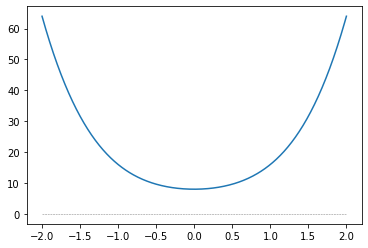

In [ ]:
gerar_grafico(-2, 2)

In [ ]:
Questao6(-2)

0 (-1.1706447283093477-0.7201936892275991j)
1 (-0.8826287782643951-0.9364057411383534j)
2 (-0.7782307306897274+0.12089750914209685j)
3 (-0.30361337663637494+0.4018618154885678j)
4 (-0.11515944728903152+0.8901817789175267j)
5 (-0.1985132385035825+1.2997313670480897j)
6 (-0.5862246065646173+1.4511176211931947j)
7 (-0.481946951714333+1.3164016182218718j)
8 (-0.4993455468969135+1.3229508910967847j)
9 (-0.4999985908984391+1.3228761938511668j)
10 (-0.49999999999810296+1.3228756555180468j)
11 (-0.5+1.3228756555322954j)
12 (-0.5+1.3228756555322954j)

Resultado: (-0.5+1.3j)


||. . . . Raizes . . . .
|:-:|:-:
|$x_{1}$|$0.5+1.3i$
|$x_{2}$|$-0.5-1.3i$
|$x_{3}$|$0.5-1.3i$
|$x_{4}$|$-0.5+1.3i$

# Quesão 10
A seguinte equação está ligada à concentração de uma substancia química em um reator completamente misturado:
$$c=c_{ent}\left (1-e^{-0,04t}  \right )+c_{0}e^{-0,04t}$$
Se a concentração inicial $c_{0} = 4$ e a concentração do fluxo de entrada for $c_{ent} = 10$, calcule o tempo necessário para que $c$ seja $93$% de $c_{ent}$.


$f(t)=c_{ent}\left (1-e^{-0,04t}  \right )+c_{0}e^{-0,04t} - 0,93c_{ent}$  
$f(t)=c_{ent} - c_{ent} e^{-0,04t}+c_{0}e^{-0,04t} - 0,93c_{ent}$  
$f(t)=(1-0,93)c_{ent} - c_{ent} e^{-0,04t}+c_{0}e^{-0,04t}$  
- $f(t)=0,07c_{ent}-c_{ent}e^{-0,04t}+c_{0}e^{-0,04t}$  
- $f'(t)=0,04(-c_{ent}+c_{0})e^{-0,04t}$

In [ ]:
c0 = 4 #@param {type:"slider", min:0, max:50, step:0.1}
cent = 10 #@param {type:"slider", min:0, max:50, step:0.1}

def F(t):
  return 0.07 * cent - cent * np.exp((-0.04) * t) + c0 * np.exp((-0.04) * t)
def dF(t):
  return (-c0 + cent) / (25 * np.exp(0.04 * t))

In [ ]:
def Questao10(t1, casas_decimais=3):
  dados = {
      'ki': [],
      'ki+1': [],
      '% erro': []
  }
  l = 10 ** -casas_decimais
  t0 = 0
  while(abs(t1 - t0) > l):
    t0 = t1
    t1 = t0 - (F(t0) / dF(t0))
    erro = abs(t1 - t0) / t1 * 100
    dados['ki'] += [t0]
    dados['ki+1'] += [t1]
    dados['erro'] += [erro]
  print(f'Resultado: {round(t1, casas_decimais)}s, Erro: {round(erro, casas_decimais)}%')
  return pd.DataFrame(dados)

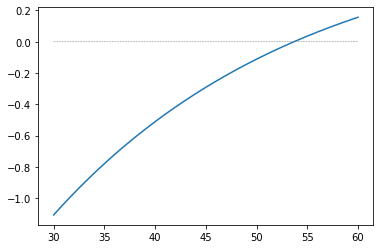

In [ ]:
gerar_grafico(30, 60)

In [ ]:
estudo_funcao(50, 55, 10)

,x,F(x),sinal
0,50.000,-0.112012,-
1,50.556,-0.094166,-
2,51.111,-0.076713,-
3,51.667,-0.059643,-
4,52.222,-0.042948,-
5,52.778,-0.026620,-
6,53.333,-0.010651,-
7,53.889,0.004967,+
8,54.444,0.020242,+


In [ ]:
Questao10(53.333)

Resultado: 53.711s, Erro: 0.0%


,ki,ki+1,erro
0,53.333000,53.708019,6.982553e-01
1,53.708019,53.710860,5.289572e-03
2,53.710860,53.710860,3.005841e-07


||Bissecção|Falsa Posição|Newton|Secantes|Secantes Modificado
|:-:|:-:|:-:|:-:|:-:|:-:|
|Dados Iniciais|[52.5, 53.75]|[52.5, 53.75]|$x_{0}=52.625$|$x_{0}=52.5$ e $x_{1}=53.75$|$x_{0}=52.625$|
|$\bar{x}$|53.71086033|53.71086033|53.71086033|53.71086033|53.7108601|
|Erro em x|$9.3\times10^{-9}$|$5.59\times10^{-9}$|$2.34\times10^{-12}$|$2.1\times10^{-8}$|$1.4\times10^{-5}$|
|Iterações|28|29|5|4|4|